# Instance and Inductive Models

![Classification Pipeline](figures/classification_pipeline.png)

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context('notebook')
sns.set_style('whitegrid')

## Classification Metrics I

![Classification Metrics](figures/classification_metrics.png)

### Binary Classification


How well did predicted values match actual labeled values?

In a 2-class problem, there are two ways to be “right”:
 - Classifier correctly identifies cases (aka “True Positives”)
 - Classifier correctly identifies non-cases (aka “True Negatives”)

...and two ways to be “wrong”:
 - Classifier incorrectly identifies a non-case as a case (aka “False Positive” or “Type I Error”)
 - Classifier incorrectly identifies a case as a non-case (aka “False Negative” or “Type II Error”)

### Multi-Class Classification


 - How correct were predictions on a per-class basis? How correct overall?

 - Are certain classes harder to predict?

 - Do we care more about accurately predicting some classes than others?

### Precision and Recall



```
precision = true positives / (true positives + false positives)

recall = true positives / (false negatives + true positives)
```

![Precision and Recall](figures/precision_recall.png)

### F1 and Accuracy



```
accuracy = true positives + true negatives / total

F1 score = 2 * ((precision * recall) / (precision + recall))
```

### ROC-AUC Curves

A ROCAUC (Receiver Operating Characteristic/Area Under the Curve) allows the user to weigh the tradeoff between the classifier’s sensitivity and specificity.

The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.

This leads to another metric, area under the curve (AUC), which is a computation of the relationship between false positives and true positives. The higher the AUC, the better the model generally is. However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the true positive rate while minimizing the false positive rate.


```python
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y,yhat)
roc_auc = auc(fpr, tpr)```


Visualize tradeoff between classifier's sensitivity (how well it finds true positives) and specificity (how well it avoids false positives)
 - straight horizontal line -> perfect classifier
 - pulling a lot toward the upper left corner -> good accuracy
 - exactly aligned with the diagonal -> coin toss


In [2]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/occupancy/occupancy.csv')


# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ["unoccupied", "occupied"]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


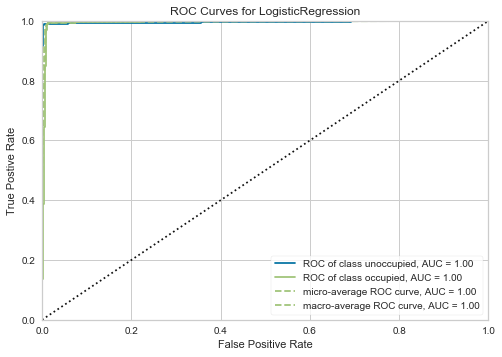

In [3]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(LogisticRegression(), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

ROC curves are typically used in binary classification, and in fact the Scikit-Learn `roc_curve` metric is only able to perform metrics for binary classifiers. 

Yellowbrick’s `ROCAUC` Visualizer does allow for plotting multiclass classification curves by binarizing the output (per-class) or to use one-vs-rest (micro score) or one-vs-all (macro score) strategies of classification.


(_note: not in master yet, but here's a preview_)

In [4]:
# Load multi-class classification dataset
game = pd.read_csv('data/game/game.csv')

classes = ["win", "loss", "draw"]

# Encode the non-numeric columns
game.replace({'loss':-1, 'draw':0, 'win':1, 'x':2, 'o':3, 'b':4}, inplace=True)

# Extract the numpy arrays from the data frame
X = game.iloc[:, game.columns != 'outcome']
y = game['outcome']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

```python
from sklearn.linear_model import RidgeClassifier

visualizer = ROCAUC(RidgeClassifier(), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data
```

![Multi-class ROCAUC](figures/multi_class_rocauc.png)

### Confusion Matrix


```python
from sklearn.metrics import confusion_matrix
```

 - takes as an argument actual values and predicted values generated by the fitted model
 - outputs a confusion matrix

![Confusion Matrix](figures/confusion_matrix.png)

The ConfusionMatrix visualizer is a ScoreVisualizer that takes a fitted scikit-learn classifier and a set of test X and y values and returns a report showing how each of the test values predicted classes compare to their actual classes. Data scientists use confusion matrices to understand which classes are most easily confused. These provide similar information as what is available in a ClassificationReport, but rather than top-level scores, they provide deeper insight into the classification of individual data points.

In [5]:
from sklearn.model_selection import train_test_split


game = pd.read_csv('data/game/game.csv')

game.replace({'loss':-1, 'draw':0, 'win':1, 'x':2, 'o':3, 'b':4}, inplace=True)

X = game.iloc[:, game.columns != 'outcome']
y = game['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

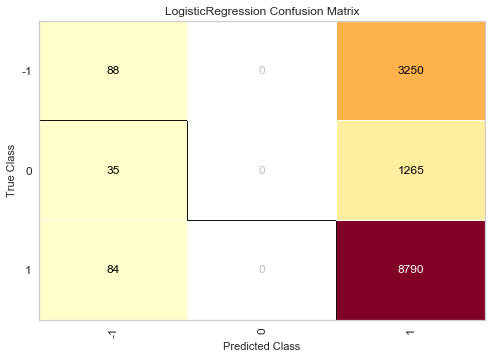

In [6]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix


model = LogisticRegression()

cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

### Classification Report

The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range `(0.0, 1.0)` to facilitate easy comparison of classification models across different classification reports.



```python
from sklearn.metrics import classification_report as cr

print(cr(y, yhat, target_names=target_names))
```


 - includes same basic info as confusion matrix
 - 3 different evaluation metrics: precision, recall, F1 score
 - includes class labels for interpretability


In [7]:
data = pd.read_csv('data/occupancy/occupancy.csv')


# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ["unoccupied", "occupied"]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


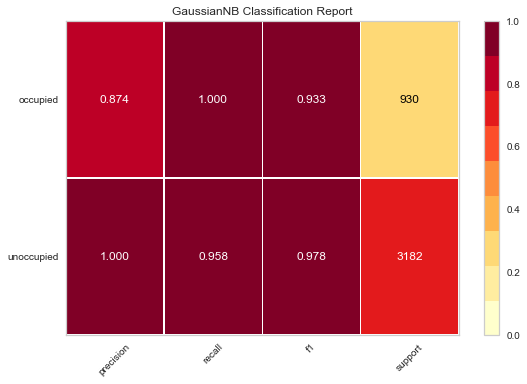

In [8]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport


bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
g = visualizer.poof() 

## Nearest Neighbors

Find a predefined (k) samples closest in distance to the input point and predict the label from those. 

Distance == similarity in this case, and can be any metric measure. Euclidean distance is most common.

Non-generalizing: must “remember” all training data.

![k-Nearest Neighbors](figures/knn.png)


In Scikit-Learn the neighbors package provides both supervised and unsupervised nearest neighbors methods - these are simple and effective!

### Unsupervised Nearest Neighbors

![k-Nearest Neighbors](figures/knn_houses_1.png)

In [9]:
from sklearn.metrics.pairwise import euclidean_distances

X = [[3,20],[20,14],[18,1],[30,30],[35,35],[56,2]]
y = [[10,10],[40,40]]

euclidean_distances(X,y)

array([[12.20655562, 42.05948169],
       [10.77032961, 32.80243893],
       [12.04159458, 44.77722635],
       [28.28427125, 14.14213562],
       [35.35533906,  7.07106781],
       [46.69047012, 41.23105626]])

![k-Nearest Neighbors](figures/knn_houses_2.png)

### Pros and Cons of KNN

#### Pros 

 - Works well with distance-sensitive data
 - Simple and effective for a wide array of tasks
 - Non parametric - works well with irregular decision boundaries.
 - Often a first approach
 - No worse than 2x Bayes error rate as data → ∞

#### Cons

 - kNN can be very arbitrary and requires hand-holding to model.
 - How do you choose k?
 - What is the definition of neighbor/similarity?
 - Suffers from the curse of dimensionality.


### Choosing K

K is an arbitrary number between 1 and the number of instances in the data set. Three options for choosing:

1. Guess
2. Heuristic
3. Optimization

Tips:
 - Avoid an even k with only 2 classes (tie break)
 - Choose k >= # classes + 1
 - Choose as low a k as possible 


#### Use coprime class and k

Coprime numbers don’t share common divisors except for 1. So 4 and 9 are coprime but not 3 and 9. 

![Coprime class and k](figures/knn_classes_coprime.png)


#### Use number of classes + 1

With k < # of classes, there is no chance that all classes will be represented - but we still want to prevent ties.

![Classes plus 1](figures/knn_classes_plus_1.png)

### Optimization

- Many people assert k should be chosen via domain knowledge - as K increases, the complexity increases and slows down performance.
 - Minimize error by trying different values of k = Hill Climbing problem. Algorithms: Genetic parameter optimization and simulated annealing. 
 - Iterate 2x through 1% of the data with a variety of K and compute error curve for minimization.


## Decision Trees

 - Another example of non-parametric inductive learning - but one that generalizes better.
 - Creates a graphical model of rules that partitions the data until a decision is reached at one of the leaf nodes. 
 - Complexity is related to the amount of data and the partitioning method.
 


![Decision Tree Example with Iris Dataset](figures/decision_tree_iris.png)

In Scikit-Learn the tree package provides classifiers and regressors based on a decision tree model. 

### Decision Tree Algorithm

Partition data as follows:
 - Start with whole training data
 - Select attribute along dimension that gives “best” split
 - Create child nodes based on split
 - Recurse on each child using child data until stop


What is the “best” split?

![Best split](figures/decision_tree_best_split.png)

### Split Metrics

**Gini Impurity (used by CART)**    
Measures how often randomly chosen elements would be incorrectly labeled according to distribution in partition. Zero value means all cases fall into single target

**Information Gain (ID3 and C5)**    
Uses entropy - the amount of information contained in every partition that represents some part of data.

**Variance Reduction (CART)**    
Maximally select the split where the most variance would be reduced, used for continuous values of data.


For a set of items where i ∈ {1,2, …, m} and 𝑓i  is the proportion of items in the split labeled i, the Gini Impurity is computed as follows:


![Gini](figures/gini.png)


Essentially the sum of the probability of an item being chosen times the probability of a mistake being made.

![Decision tree in process](figures/decision_tree_process.png)

### Pros and Cons of Decision Trees

#### Pros

 - Simple to understand; no representational mysticism. Trees can be drawn out.
 - No need to normalize or standardize (need to deal with missing values).
 - Low cost
 - Handle multi-output
 - Validate with Statistics!
 - Handles wrong assumptions.

#### Cons

 - Prone to overfit (deep trees don’t generalize)
 - Minor variations in data cause big changes in tree structure (unstable)... fix with ensemble methods.
 - Create biases if some classes dominate
 - Some functions are impossible to model


### Tips for Avoiding Overfit

Ratio of samples to number of features is important, trees in high dimensional space are very likely to overfit.

Balance your dataset before training to prevent the tree from creating a tree biased toward the classes that are dominant.

Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.

### Tips for Tuning

Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.

Perform dimensionality reduction to give tree a better chance of finding features that are discriminative (PCA, ICA, Feature Selection)

Or, just use a Random Forest...


```python
from sklearn.ensemble import RandomForestClassifier

splits = train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model = RandomForestClassifier()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print(classification_report(expected, predicted))
```

### Decision Stumps

## Ensembles

### Random Forest

Random forests are an ensemble learning method that are effective at correcting for decision trees' habit of overfitting to their training set.


The model creates a number of decision trees using the CART algorithm, each on a different subset of the data. The general approach to creating the ensemble is bootstrap aggregation of the decision trees (also known as 'bagging').

![Random Forest](figures/random_forest.png)

#### Strategy: 

Construct many decision trees at training time and output...

*(Classification)*    
...the mode of the classes of the individual trees.

*(Regression)*    
... the mean prediction of the individual trees. 

In [10]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

splits = train_test_split(diabetes.data, diabetes.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

In [12]:
import os
import requests
import pandas as pd

HABERMAN_SURVIVAL_URL = "https://bit.ly/1IPs7Vo"
response = requests.get(HABERMAN_SURVIVAL_URL)
outpath = os.path.abspath("haberman.txt")
with open(outpath, 'wb') as f:
    f.write(response.content)

df = pd.read_csv("haberman.txt", header=None, names=["age_at_op","op_yr","nr_nodes","survival"])
X = df[["age_at_op","op_yr","nr_nodes"]]
y = df[["survival"]]

splits = train_test_split(X, y.values.ravel(), test_size=0.2)
X_train, X_test, y_train, y_test = splits

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

## Boosting

### Gradient Boosting

### AdaBoost